In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Mumbai House Prices.csv')

In [3]:
df["price_unit"]= df["price_unit"].replace("Cr" , "0000000", regex=True)
df["price_unit"]= df["price_unit"].replace("L" , "00000", regex=True)

In [4]:
df["price"]=df["price"].astype("int")
df["price_unit"]=df["price_unit"].astype("str")
df["price"]=df["price"].astype("str")



In [5]:
df["Total_price"]=df["price"]+df["price_unit"]

In [6]:
df["Total_price"] = df["Total_price"].astype("int")

In [7]:
df= df.drop("price" , axis=1)
df= df.drop("price_unit" , axis=1) 
df= df.drop("locality" , axis=1)    

In [8]:
df["status"]= df["status"].replace("Ready to move" , "1", regex=True)
df["status"]= df["status"].replace("Under Construction" , "0", regex=True)

In [9]:
df["status"]= df["status"].astype("int")

In [10]:
df["age"]= df["age"].replace("New" , "1", regex=True)
df["age"]= df["age"].replace("Resale" , "-1", regex=True)
df["age"]= df["age"].replace("Unknown" , "0", regex=True)

In [11]:
df["age"]=df["age"].astype(int)

In [12]:
df["type"]= df["type"].replace("Apartment" , "1", regex=True)
df["type"]= df["type"].replace("Villa" , "2", regex=True)
df["type"]= df["type"].replace("Studio 1" , "3", regex=True)
df["type"]= df["type"].replace("Independent House" , "4", regex=True)
df["type"]= df["type"].replace("Penthouse" , "5", regex=True)


In [13]:
df["type"] = df["type"].astype(int)

In [14]:
df

,bhk,type,area,region,status,age,Total_price
0,3,1,685,Andheri West,1,1,20000000
1,2,1,640,Naigaon East,0,1,5200000
2,2,1,610,Borivali West,0,1,10000000
3,2,1,876,Panvel,0,1,5900000
4,2,1,659,Mira Road East,0,1,9400000
...,...,...,...,...,...,...,...
76033,3,1,1527,Juhu,1,0,70000000
76034,5,1,3049,Juhu,1,0,120000000
76035,4,1,3313,Napeansea Road,1,0,100000000
76036,2,1,1305,Bandra East,1,0,40000000


In [15]:
df["f1"]=(df["Total_price"]/df["area"])

In [16]:
df["f1"]=df["f1"].astype("int")

<AxesSubplot: >

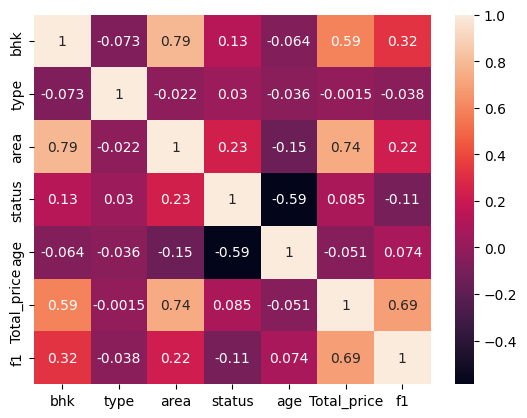

In [17]:
mat=df.drop("region" , axis=1).corr()
sns.heatmap(mat,annot = True)

In [18]:
x=df[["bhk","area"]]
y=df[["Total_price"]]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y , test_size =0.2)

In [21]:
print(len(xtrain) ,len(ytrain), len(xtest) ,len(ytest))


60830 60830 15208 15208


In [28]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

60.08371534247124

In [32]:
xtest

,bhk,area
15717,1,468
29829,2,485
66011,3,2100
34127,3,1002
33067,1,550
...,...,...
38052,1,460
30089,2,567
60976,2,1060
62042,3,1650


In [37]:
model.predict([[1,550]])

array([6771013.], dtype=float32)

In [23]:
from joblib import dump

In [24]:
dump(model, 'mumbai.pkl')

['mumbai.pkl']

TypeError: 'method' object is not subscriptable

In [25]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(xtrain,ytrain)
model3.predict(xtest)
print("Traning = ",model3.score(xtrain,ytrain)*100)
print("Testing = ",model3.score(xtest,ytest)*100)


C:\Users\MOHMAD\AppData\Local\Temp\ipykernel_9772\178391687.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(xtrain,ytrain)


Traning =  77.70335883733763
Testing =  67.58362300798387
